# <font color='steelblue'>
______________________________________________________________________________________________________________________________________________________
### <center> <font color='steelblue'> Post-graduation in Data Science for Finance
##### <center> <font color='steelblue'> 2024 / 25
# <center> <font color='steelblue'> Computational Finance
### <center> <font color='steelblue'><font> Prof. David Duarte </font>
______________________________________________________________________________________________________________________________________________________
### <center> <font color='steelblue'><font> Students:</font>
##### <center> <font color='steelblue'><font> Diogo Rodrigues, 20211666 </font>
##### <center> <font color='steelblue'><font> Gonçalo Gomes, 20211007 </font>
##### <center> <font color='steelblue'><font> Petr Terletskiy, 20211580 </font>
##### <center> <font color='steelblue'><font> Tiago Paulino, 20211601 </font>

______________________________________________________________________________________________________________________________________________________
### <center> <font color='steelblue'><font> Group Assignment </font>
______________________________________________________________________________________________________________________________________________________


# DS4F - Computational Finance
## Group Assignment

The commented code (jupyter notebook or python script) should be submitted no later than November 15th, 2024via Moodle or by email to dduarte@novaims.unl.pt.


## 0. Libraries

In [ ]:
import yfinance as yf # downloads historical market data from Yahoo Finance
import pandas as pd # data manipulation and analysis library

import matplotlib.pyplot as plt # plotting library for creating visualizations

import seaborn as sns # data visualization library that provides a high-level interface for creating attractive and informative statistical graphics
import numpy as np # package for scientific computing, providing array operations

import glob # used for file pattern matching, allowing users to search for files and directories with specific naming pattern

from scipy.optimize import minimize # optimization library for solving minimization and maximization problems

## 1. (5 pts) Working with price data

### 1.1. Download the components from the PSI20 index from the following url using Pandas

https://en.wikipedia.org/wiki/PSI-20

In [ ]:
# define url
url = 'https://en.wikipedia.org/wiki/PSI-20'

# reads the html content
raw_psi20 = pd.read_html(url)
raw_psi20

[                  0                             1
 0        Foundation              31 December 1992
 1          Operator                      Euronext
 2         Exchanges               Euronext Lisbon
 3      Constituents                            20
 4              Type                     Large cap
 5        Market cap  €61.50 billion (end 2010)[1]
 6  Weighting method       Capitalization-weighted
 7   Related indices                     PSI Geral
 8           Website              www.euronext.com,
     Year  Closing level Change in index in points Change in index in %
 0   1992        3000.00                       NaN                  NaN
 1   1993        4288.09                   1288.09                42.94
 2   1994        4157.25                   −130.84                −3.05
 3   1995        3896.24                   −261.01                −6.28
 4   1996        5146.33                   1250.09                32.08
 5   1997        8803.50                   3657.17       

In [ ]:
# retrieves data frame from position 2 in the array
psi20 = raw_psi20[2]

# names the columns
psi20.columns = [
    'Company',
    'Industry',
    'Ticker',
    'Weight'
]

# sets ticker ad index column
psi20 = psi20.set_index('Ticker')

# remove the row for "Sonae Capital" and add its weight to "Sonae",
# as 'SONC' stock doesn't exist (yfinance wasn't able to download its data)
sonae_capital_weight = psi20.loc['SONC', 'Weight']
psi20.loc['SON', 'Weight'] += sonae_capital_weight

# drop the "Sonae Capital" row
psi20 = psi20.drop('SONC')
psi20


,Company,Industry,Weight
Ticker,,,
ALTR,Altri,Basic Resources,2.03
BCP,Banco Comercial Português,Banks,17.04
COR,Corticeira Amorim,Industrial Goods & Services,2.62
CTT,CTT Correios de Portugal,Industrial Goods & Services,3.02
EDPR,EDP Renováveis,Utilities,9.69
EDP,Energias de Portugal,Utilities,10.36
GALP,Galp Energia,Energy,11.50
IBS,Ibersol,Travel & Leisure,0.93
JMT,Jerónimo Martins,"Personal Care, Drug & Grocery Stores",10.55


### 1.2. Since the listed tickers "XXX" don't contain the information about the exchange, use list comprehension to add ".LS" to the end of each ticker

Hint: From ["AAA", "BBB", "CCC"] to ["AAA.LS", "BBB.LS", "CCC.LS"]

In [ ]:
# define suffix
suffix = '.LS'

# iterates list and adds suffix
psi20.index = [ticker + suffix for ticker in psi20.index.tolist()]
psi20

,Company,Industry,Weight
ALTR.LS,Altri,Basic Resources,2.03
BCP.LS,Banco Comercial Português,Banks,17.04
COR.LS,Corticeira Amorim,Industrial Goods & Services,2.62
CTT.LS,CTT Correios de Portugal,Industrial Goods & Services,3.02
EDPR.LS,EDP Renováveis,Utilities,9.69
EDP.LS,Energias de Portugal,Utilities,10.36
GALP.LS,Galp Energia,Energy,11.50
IBS.LS,Ibersol,Travel & Leisure,0.93
JMT.LS,Jerónimo Martins,"Personal Care, Drug & Grocery Stores",10.55
EGL.LS,Mota-Engil,Construction & Materials,2.22


### 1.3. Use Yahoo Finance (yfinance) to download the data for all ticker from 2012 to the present date

In [ ]:
# convert tickers to list
tickers_as_list = psi20.index.tolist()

# sets a start date
start_date = "2012-01-01"

# downloads data
historical_data = yf.download(
    tickers_as_list,
    start=start_date,
    end=None,
    group_by='ticker')

historical_data

[*********************100%***********************]  17 of 17 completed


Ticker                    SON.LS                                          \
Price                       Open   High    Low  Close Adj Close   Volume   
Date                                                                       
2012-01-02 00:00:00+00:00  0.465  0.470  0.459  0.468  0.244075   650819   
2012-01-03 00:00:00+00:00  0.470  0.473  0.463  0.473  0.246683  1813599   
2012-01-04 00:00:00+00:00  0.471  0.475  0.459  0.463  0.241467  1009150   
2012-01-05 00:00:00+00:00  0.464  0.464  0.445  0.449  0.234166  2692052   
2012-01-06 00:00:00+00:00  0.449  0.462  0.447  0.450  0.234687  3295422   
...                          ...    ...    ...    ...       ...      ...   
2024-11-08 00:00:00+00:00  0.907  0.915  0.906  0.910  0.910000  1121334   
2024-11-11 00:00:00+00:00  0.912  0.928  0.912  0.926  0.926000  1569329   
2024-11-12 00:00:00+00:00  0.925  0.929  0.920  0.920  0.920000   858109   
2024-11-13 00:00:00+00:00  0.920  0.930  0.914  0.914  0.914000  1702137   
2024-11-14 00:00:00+00:00  0.925  0.948  0.918  0.919  0.919000  2950512   

Ticker                       NBA.LS                                ...  \
Price                          Open      High       Low     Close  ...   
Date                                                               ...   
2012-01-02 00:00:00+00:00  2.235602  2.235602  2.193619  2.193619  ...   
2012-01-03 00:00:00+00:00  2.172628  2.172628  2.130644  2.151636  ...   
2012-01-04 00:00:00+00:00  2.172628  2.172628  2.099157  2.099157  ...   
2012-01-05 00:00:00+00:00  2.120149  2.130644  2.099157  2.109653  ...   
2012-01-06 00:00:00+00:00  2.088661  2.099157  2.088661  2.099157  ...   
...                             ...       ...       ...       ...  ...   
2024-11-08 00:00:00+00:00  5.850000  5.850000  5.750000  5.750000  ...   
2024-11-11 00:00:00+00:00  5.750000  5.800000  5.750000  5.750000  ...   
2024-11-12 00:00:00+00:00  5.800000  5.800000  5.750000  5.800000  ...   
2024-11-13 00:00:00+00:00  5.750000  5.900000  5.750000  5.900000  ...   
2024-11-14 00:00:00+00:00  5.800000  5.850000  5.800000  5.850000  ...   

Ticker                        JMT.LS                               NOS.LS  \
Price                            Low      Close  Adj Close  Volume   Open   
Date                                                                        
2012-01-02 00:00:00+00:00  12.800000  13.025000   8.648351  152170  2.283   
2012-01-03 00:00:00+00:00  12.960000  13.125000   8.714749  431782  2.498   
2012-01-04 00:00:00+00:00  13.000000  13.000000   8.631751  462349  2.628   
2012-01-05 00:00:00+00:00  12.900000  13.045000   8.661632  562794  2.440   
2012-01-06 00:00:00+00:00  12.930000  13.060000   8.671592  215578  2.386   
...                              ...        ...        ...     ...    ...   
2024-11-08 00:00:00+00:00  18.190001  18.680000  18.680000  866916  3.370   
2024-11-11 00:00:00+00:00  18.450001  18.520000  18.520000  430124  3.385   
2024-11-12 00:00:00+00:00  18.370001  18.719999  18.719999  709748  3.395   
2024-11-13 00:00:00+00:00  18.549999  18.549999  18.549999  616121  3.400   
2024-11-14 00:00:00+00:00  18.209999  18.209999  18.209999  776735  3.370   

Ticker                                                             
Price                       High    Low  Close Adj Close   Volume  
Date                                                               
2012-01-02 00:00:00+00:00  2.500  2.283  2.470  1.100166  4247035  
2012-01-03 00:00:00+00:00  2.650  2.430  2.620  1.166977   850346  
2012-01-04 00:00:00+00:00  2.639  2.444  2.445  1.089030   679348  
2012-01-05 00:00:00+00:00  2.460  2.325  2.376  1.058297   385766  
2012-01-06 00:00:00+00:00  2.478  2.386  2.405  1.071213   324121  
...                          ...    ...    ...       ...      ...  
2024-11-08 00:00:00+00:00  3.395  3.370  3.370  3.370000   241337  
2024-11-11 00:00:00+00:00  3.415  3.385  3.395  3.395000   216830  
2024-11-12 00:00:00+00:00  3.395  3.355  3.365  3.365000   296991  
202

### 1.4. Eliminate tickers that don't have prices since 2012

In [ ]:
# drop ticker without historical data
historical_data = historical_data.dropna(
    axis=1,
    how='all')

# check tickers with data since 2012
valid_tickers = historical_data.columns.levels[0]
valid_tickers = [ticker for ticker in valid_tickers if ticker in psi20.index]

# update data frame
psi20_filtered = psi20.loc[valid_tickers]
print(
    f' Length of the old dataset: {len(psi20)}\n Length of the filtered dataset: {len(psi20_filtered)}'
    )

 Length of the old dataset: 17
 Length of the filtered dataset: 17


### 1.5. Create a new DataFrame with the returns using the column "Adj Close"

$return = \frac{price_t}{price_{t-1}}  - 1 $


Hint: there is a pandas function that performs this calculation directly

In [ ]:
# calculate returns
adj_close_data = historical_data.xs(
    'Adj Close',
    axis=1,
    level=1
    )

returns = adj_close_data.pct_change() # getting the daily percetange changes
returns = returns.iloc[1:] # removing the 1st row, as it will have NaN values
returns.head(5)

Ticker,SON.LS,NBA.LS,ALTR.LS,PHR.LS,EDPR.LS,BCP.LS,SEM.LS,EGL.LS,RENE.LS,COR.LS,NVG.LS,EDP.LS,GALP.LS,CTT.LS,IBS.LS,JMT.LS,NOS.LS
Date,,,,,,,,,,,,,,,,,
2012-01-03 00:00:00+00:00,0.010684,-0.019139,0.038884,0.013137,-0.009028,0.048950,-0.002559,-0.007619,-0.010989,-0.007143,0.012834,0.001219,0.053237,NaN,0.046798,0.007678,0.060729
2012-01-04 00:00:00+00:00,-0.021142,-0.024390,-0.033360,-0.025495,-0.007415,-0.120000,-0.001100,-0.000960,-0.033817,-0.007194,-0.020591,0.002842,-0.005257,NaN,0.000000,-0.009524,-0.066794
2012-01-05 00:00:00+00:00,-0.030238,0.005000,-0.021885,-0.009923,0.003201,-0.083332,-0.018349,-0.005764,-0.024499,-0.021739,-0.005930,-0.028340,-0.003659,NaN,-0.011765,0.003462,-0.028221
2012-01-06 00:00:00+00:00,0.002227,-0.004975,0.012908,-0.002278,0.033830,0.123966,0.026729,0.009662,0.025115,0.000000,0.009762,0.001667,0.037128,NaN,0.000000,0.001150,0.012205
2012-01-09 00:00:00+00:00,0.006667,0.000000,-0.011894,-0.018037,-0.016258,0.036765,-0.035136,-0.009569,0.004000,0.000000,-0.018260,-0.009568,-0.006294,NaN,0.000000,0.008805,0.002495


### 1.6. Make a plot with the cumulative return of all tickers on the same axis

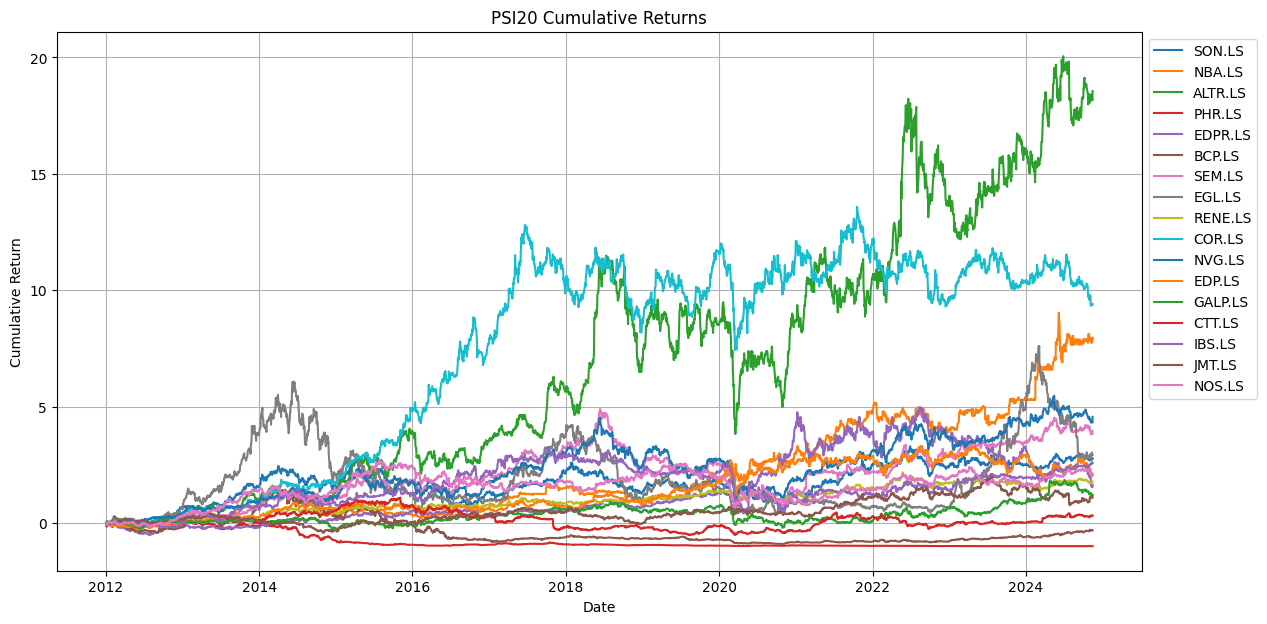

In [ ]:
# cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

# plot
plt.figure(figsize=(14, 7))
for ticker in cumulative_returns.columns:
    plt.plot(
        cumulative_returns.index,
        cumulative_returns[ticker],
        label=ticker)

plt.title('PSI20 Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

### 1.7. Make a histogram for the returns
- Use one figure for all plots with 4 subplots in each row
- Define a title for each graph with the ticker
- Use the same axis scale for x and y

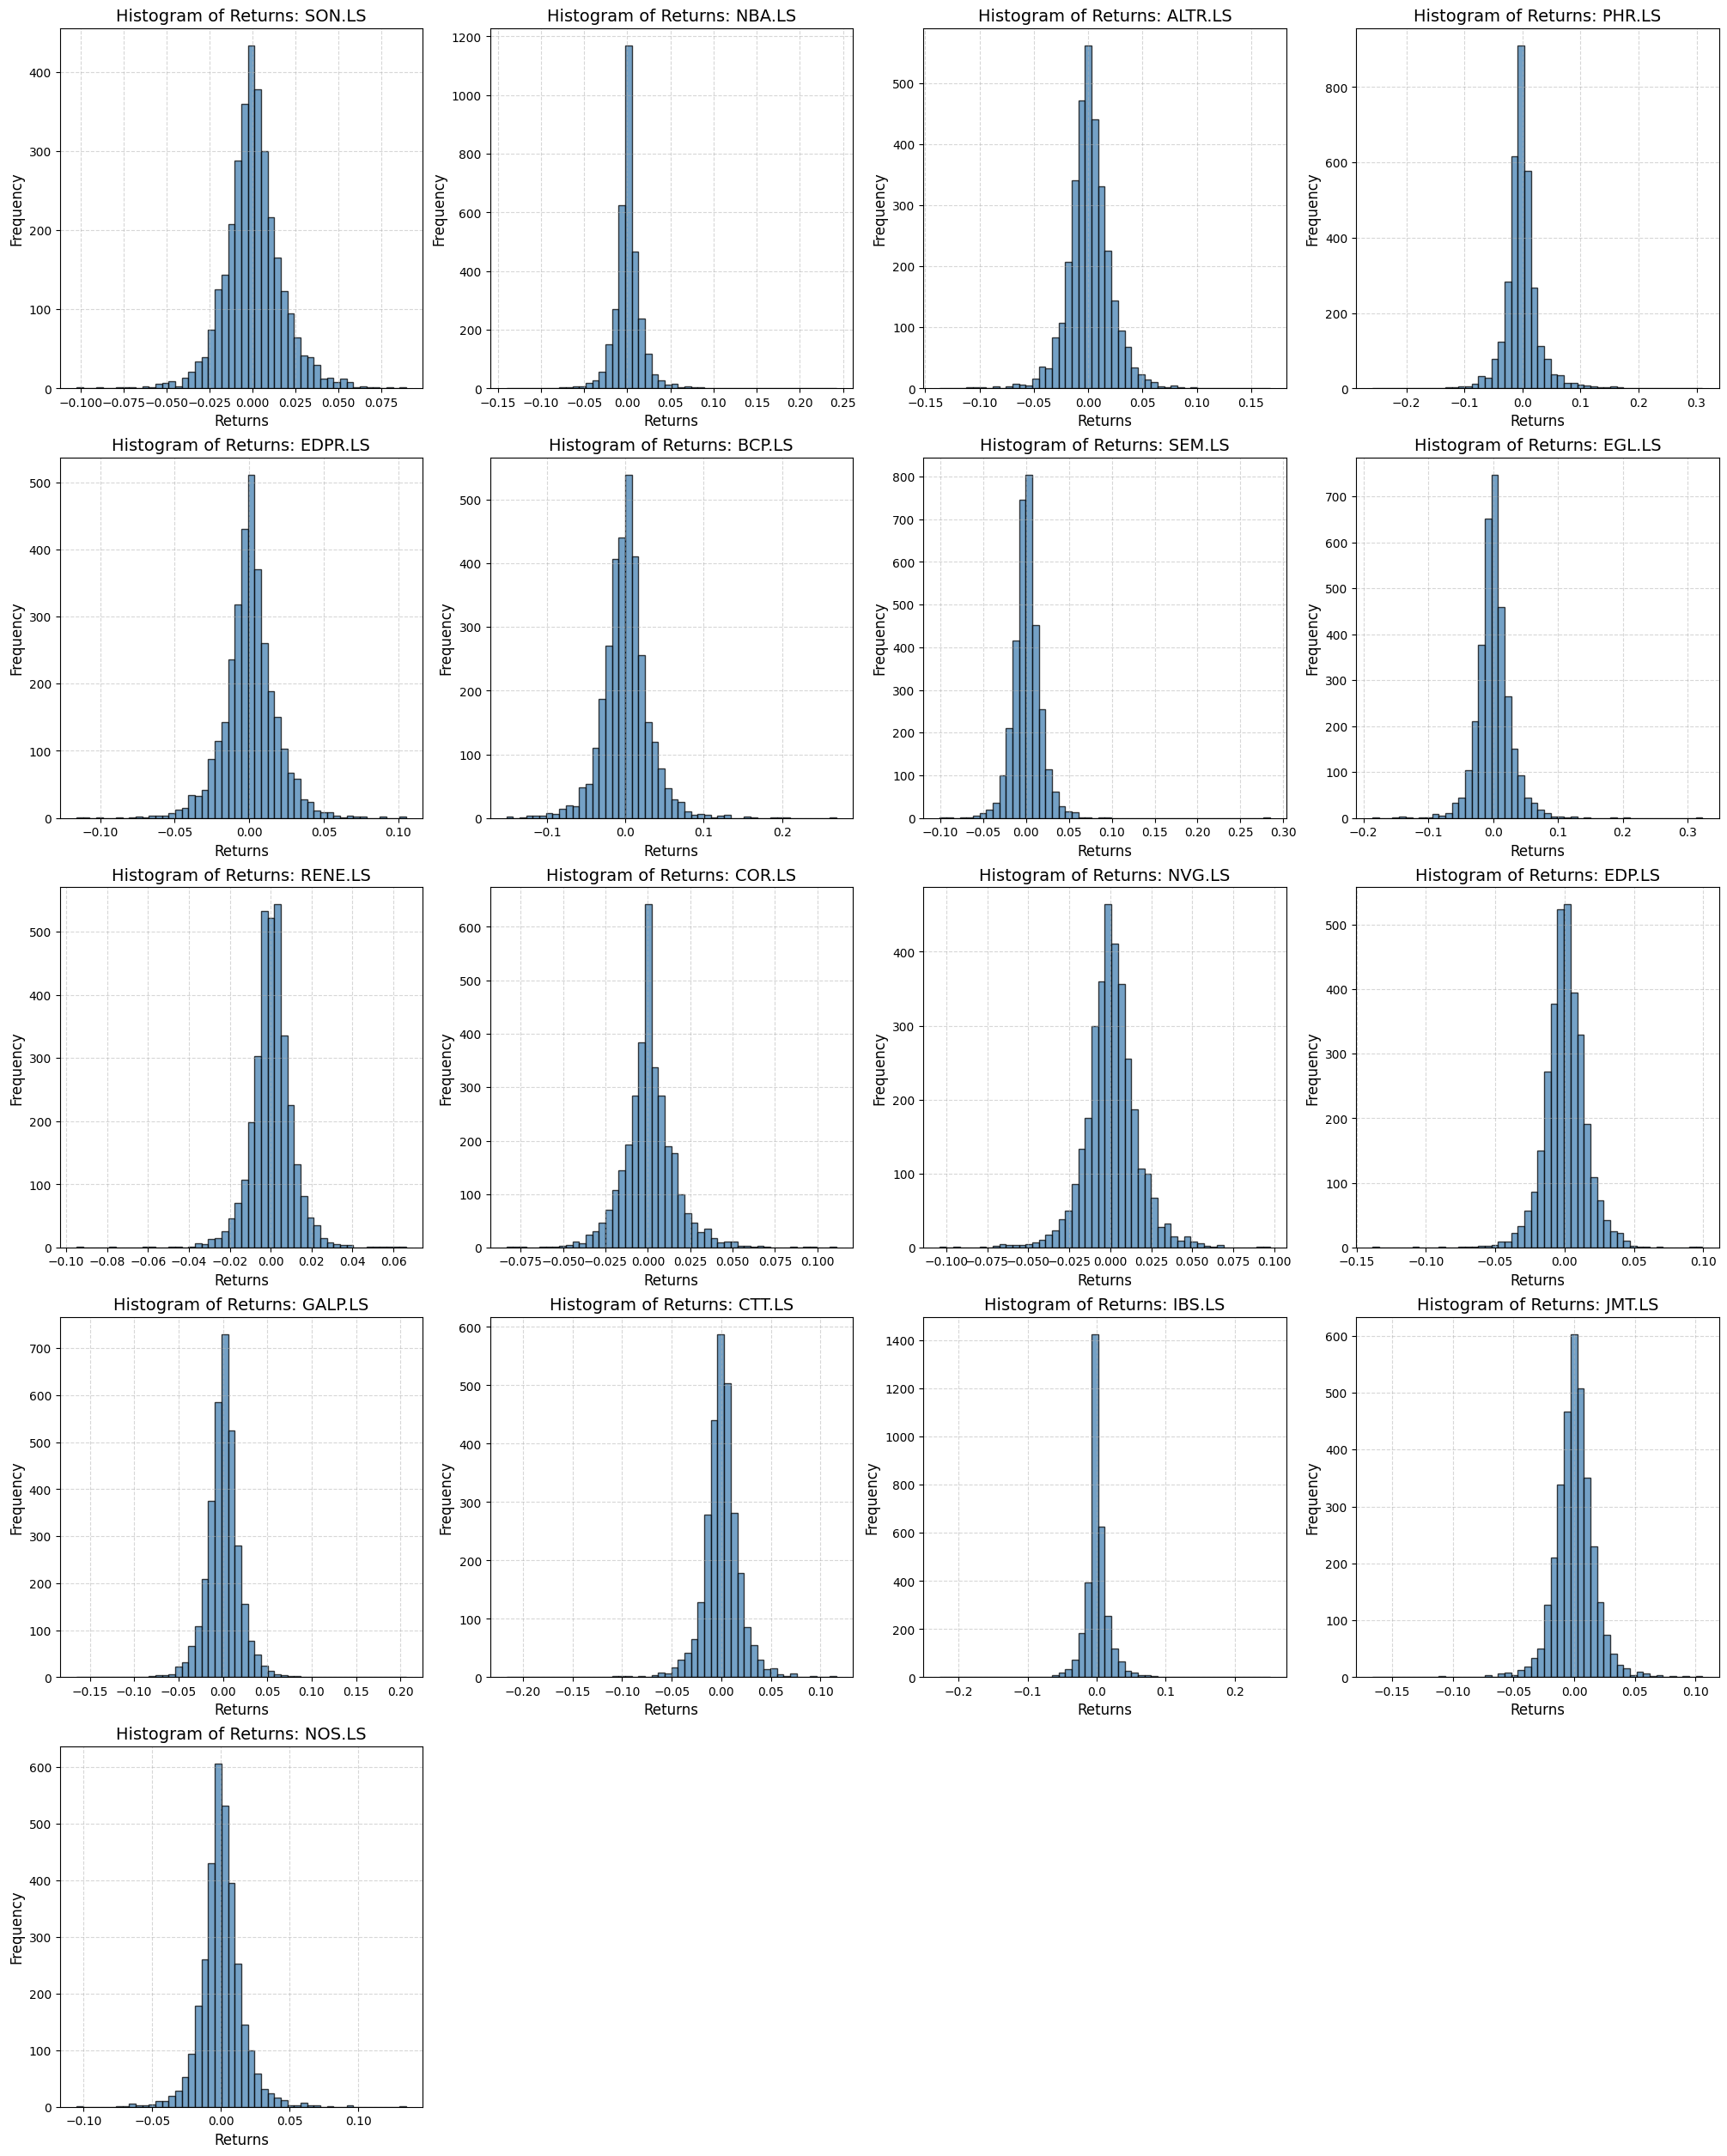

In [ ]:
# configuration
num_tickers = len(returns.columns)
num_cols = 4
num_rows = (num_tickers + num_cols - 1) // num_cols

# create subplots
fig, axes = plt.subplots(
    num_rows,
    num_cols,
    figsize=(20, 5 * num_rows),
    constrained_layout=True
)

axes = axes.flatten()

# loop through each ticker and plot histogram

for i, ticker in enumerate(returns.columns):
    axes[i].hist(
        returns[ticker].dropna(),
        bins=50,
        color='steelblue',
        edgecolor='black',
        alpha=0.75
    )
    axes[i].set_title(f'Histogram of Returns: {ticker}', fontsize=14)
    axes[i].set_xlabel('Returns', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(visible=True, linestyle='--', alpha=0.5)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

### 1.8. Create a correlation matrix of the returns

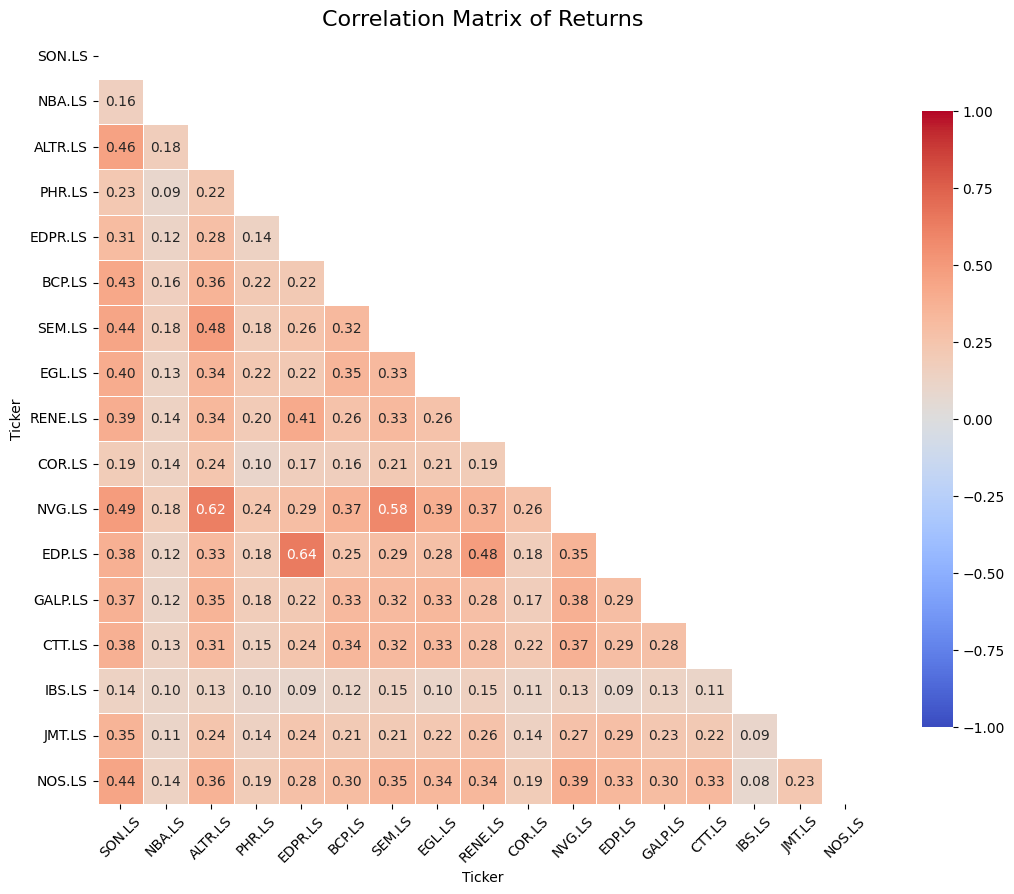

In [ ]:
# generate the correlation matrix
correlation_matrix = returns.corr()

# create a mask that will only display the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# plot the correlation matrix with only the lower triangle visible
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Matrix of Returns', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


### 1.9. Save the data (Adj Close Price and Volume) to a CSV file, separate file for each ticker

In [ ]:
output_path = 'psi20_data-'

# save the data to CSV
for ticker in historical_data.columns.levels[0]:
    data_to_save = historical_data[ticker][['Adj Close', 'Volume']]

    # file name
    file_name = f"{output_path}{ticker}.csv"

    # save CSV
    data_to_save.to_csv(file_name)
    print(f"Saved {file_name}")

Saved psi20_data-ALTR.LS.csv
Saved psi20_data-BCP.LS.csv
Saved psi20_data-COR.LS.csv
Saved psi20_data-CTT.LS.csv
Saved psi20_data-EDP.LS.csv
Saved psi20_data-EDPR.LS.csv
Saved psi20_data-EGL.LS.csv
Saved psi20_data-GALP.LS.csv
Saved psi20_data-IBS.LS.csv
Saved psi20_data-JMT.LS.csv
Saved psi20_data-NBA.LS.csv
Saved psi20_data-NOS.LS.csv
Saved psi20_data-NVG.LS.csv
Saved psi20_data-PHR.LS.csv
Saved psi20_data-RENE.LS.csv
Saved psi20_data-SEM.LS.csv
Saved psi20_data-SON.LS.csv


### 1.10. Load the data from the CSV files that you just saved to one DataFrame with the prices per ticker

In [ ]:
price_files = glob.glob("*.csv")
prices_df = pd.DataFrame()

#for each file we are going to define a column with the values inside
for file in price_files:
    ticker = file.replace("psi20_data-", "").replace(".csv", "")
    df = pd.read_csv(file, usecols=['Date', 'Adj Close']).set_index('Date')
    df.columns = [ticker]
    prices_df = pd.concat([prices_df, df], axis=1)

prices_df.index = pd.to_datetime(prices_df.index)
prices_df.head()

,NBA.LS,GALP.LS,IBS.LS,ALTR.LS,COR.LS,BCP.LS,NVG.LS,JMT.LS,EDP.LS,CTT.LS,SON.LS,RENE.LS,EGL.LS,NOS.LS,PHR.LS,EDPR.LS,SEM.LS
Date,,,,,,,,,,,,,,,,,
2012-01-02 00:00:00+00:00,0.657427,7.030364,2.098173,0.261043,0.788619,0.642360,0.648517,8.648351,1.096663,NaN,0.244075,0.841514,0.654204,1.100166,2.822735,4.185903,2.877418
2012-01-03 00:00:00+00:00,0.644845,7.404638,2.196363,0.271194,0.782986,0.673803,0.656840,8.714749,1.098000,NaN,0.246683,0.832267,0.649220,1.166977,2.859818,4.148112,2.870054
2012-01-04 00:00:00+00:00,0.629117,7.365714,2.196363,0.262147,0.777353,0.592947,0.643315,8.631751,1.101121,NaN,0.241467,0.804122,0.648597,1.089030,2.786908,4.117354,2.866898
2012-01-05 00:00:00+00:00,0.632263,7.338765,2.170523,0.256410,0.760454,0.543535,0.639500,8.661632,1.069915,NaN,0.234166,0.784422,0.644859,1.058297,2.759253,4.130535,2.814295
2012-01-06 00:00:00+00:00,0.629117,7.611238,2.170523,0.259719,0.760454,0.610915,0.645742,8.671592,1.071699,NaN,0.234687,0.804122,0.651089,1.071213,2.752968,4.270269,2.889518


### 1.11. Group (sum) the volume for each asset by year, month

In [ ]:
# aggregate monthly volume for each asset
volume_df = pd.DataFrame()

#for each file we are going to define a column with the values inside
for file in price_files:
    ticker = file.replace("psi20_data-", "").replace(".csv", "")
    df = pd.read_csv(file, usecols=['Date', 'Volume']).set_index('Date')
    df.index = pd.to_datetime(df.index)
    df.columns = [ticker]
    volume_df = pd.concat([volume_df, df], axis=1)

# group the data by year and month, summing volume
monthly_volume = volume_df.resample('M').sum()
monthly_volume.index = monthly_volume.index.strftime('%Y-%m')
monthly_volume.head()

<ipython-input-14-d748a49faaa1>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume = volume_df.resample('M').sum()


,NBA.LS,GALP.LS,IBS.LS,ALTR.LS,COR.LS,BCP.LS,NVG.LS,JMT.LS,EDP.LS,CTT.LS,SON.LS,RENE.LS,EGL.LS,NOS.LS,PHR.LS,EDPR.LS,SEM.LS
Date,,,,,,,,,,,,,,,,,
2012-01,238615,24365178,71820,3115705,142693,407815360,3455474,11724980,129543689,0.0,30402041,3827358,1732904,11866080,62450893,14392738,1498325
2012-02,214278,28609208,74246,4548409,78792,621519083,4037731,14358151,130157109,0.0,39050733,2952523,4858139,8318729,76955801,13898933,1340791
2012-03,230644,27729415,217382,5919776,411730,290350860,3633688,14756804,135800694,0.0,47155758,31847178,1840524,6074238,57843754,12567131,1374240
2012-04,145334,31601868,89264,2946106,164452,192273373,6218683,14874039,88022905,0.0,38829171,1984371,4872405,4555873,67258885,17984759,1197362
2012-05,279343,30718321,12574,3207600,227731,154520229,2840640,10834840,176322716,0.0,30865262,1472468,5137230,94072326,106228112,42345863,1001244


### 1.12) Make a bar plot with the volume per month, per ticker

- One single plot
- X Axis has 12 ticks (months)

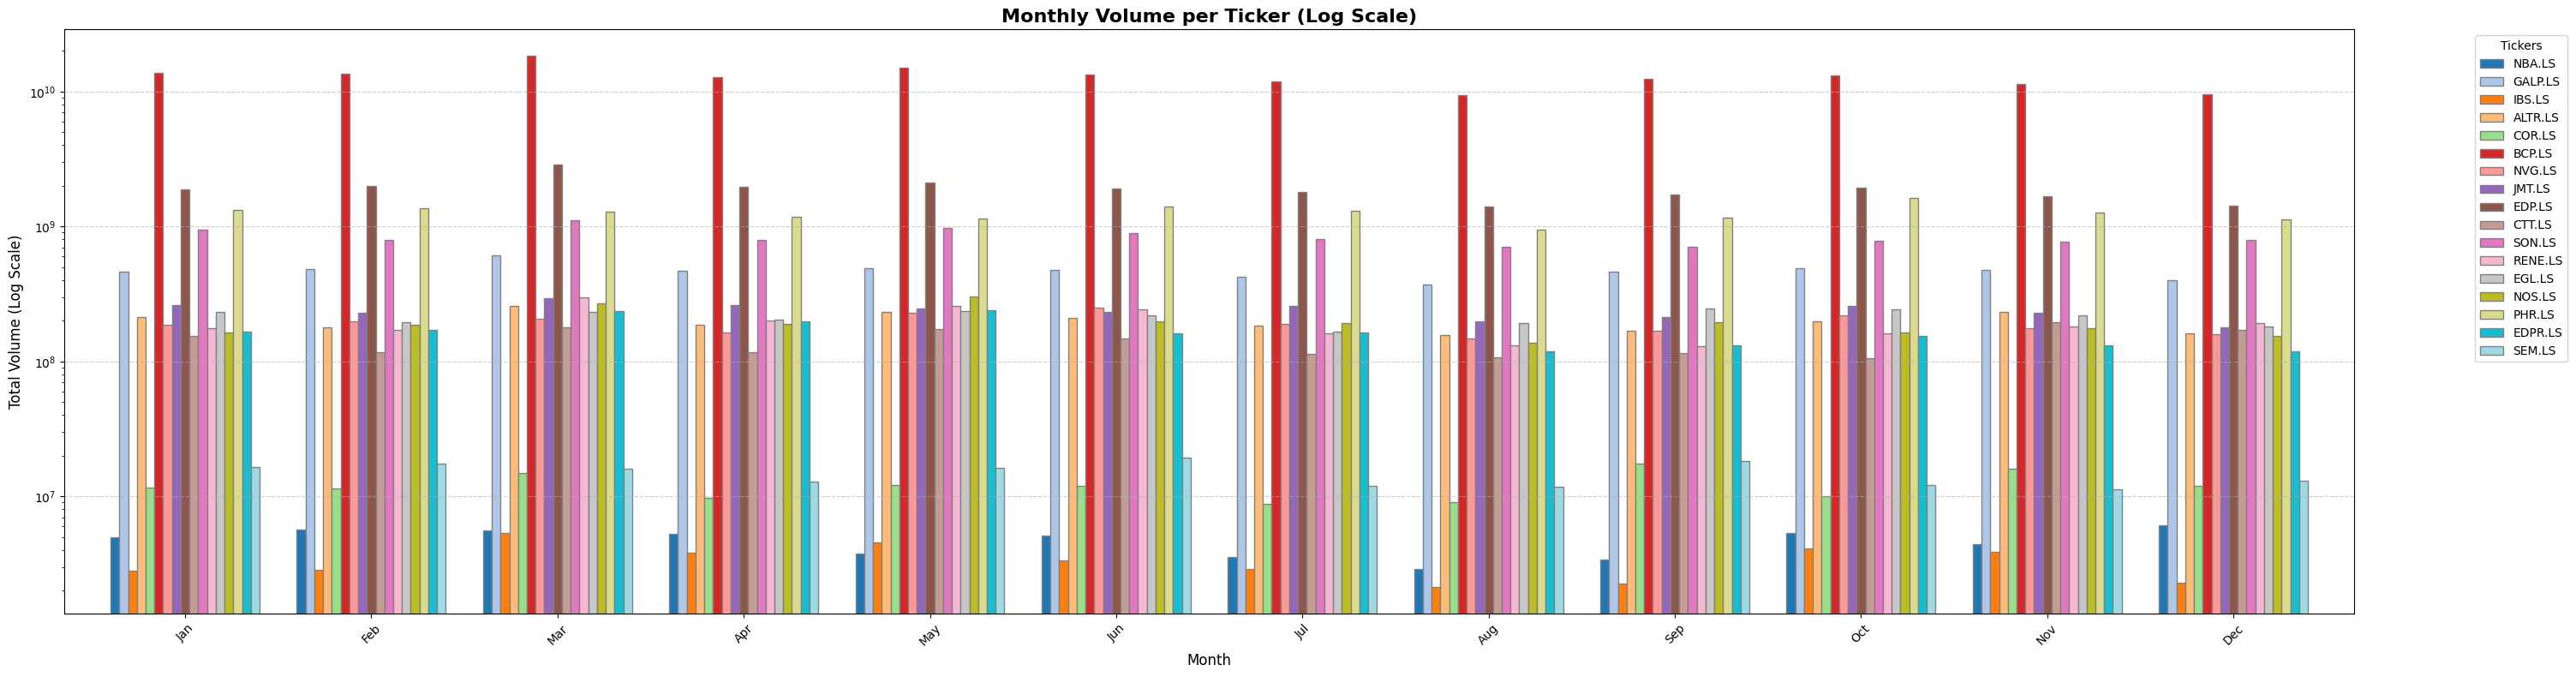

In [20]:
# making sure that the index is in the correct format
monthly_volume.index = pd.to_datetime(monthly_volume.index)

# grouping by the month and summing the volume
monthly_volume_grouped = monthly_volume.groupby(monthly_volume.index.month).sum()

fig, ax = plt.subplots(figsize=(30, 8))
monthly_volume_grouped.plot(
    kind='bar',
    ax=ax,
    colormap='tab20',
    edgecolor='grey',
    width=0.8 )

# setting logarithmic scale for y-axis for a better visualization
ax.set_yscale('log')
ax.set_title('Monthly Volume per Ticker (Log Scale)', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total Volume (Log Scale)', fontsize=12)

# x-ticks customization
ax.set_xticks(range(12))
ax.set_xticklabels(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=45,
    fontsize=10
)

# adjusting the label
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Tickers')

# adding gridlines for better visibility
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## 2. (5 pts) Optimization




We will discuss why setting a target return is crucial for portfolio management


- Downlad from YahooFinance the price of Bitcoin (BTC-USD), ETHEREUM (ETH-USD), SOLANA (SOL-USD), and three stocks of your choice for the period between 30.06.2024 and 30.09.2024.
- Calculate the average daily return for the period and annualize it
- Build a portfolio with the six assets with that has a target return of 35%, with the following restrictions:
    - Sum of weights = 100%
    - Total allocation to criptocurrencies should be at most 30%

Firstly, we will download the prices of the assets we will be working with:
- **Bitcoin** (BTC-USD)
- **Ethereum** (ETH-USD)
- **Solana** (SOL-USD)
- **Nvidia** (NVDA)
- **Tesla** (TSLA)
- **Taiwan Semiconductor Manufacturing Company** (TSM)

<br>

The period we will be working with is between 30th June 2024 and 30th September 2024.

In [21]:
# we will be working with Bitcoin, Ethereum, Solana, Nvidia, Tesla & TSMC (Taiwan Semiconductor Manufacturing Company)
assets = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'NVDA', 'TSLA', 'TSM']

# setting the start and the end dates
start_date = '2024-06-30'
end_date = '2024-09-30'

# downloading the assets' prices and creating a dataset
df = yf.download(assets, start=start_date, end=end_date)
closing_prices = df['Adj Close'].dropna() # removing the weekends, as stocks will have NaN values during those days
closing_prices.head(12)

[*********************100%***********************]  6 of 6 completed


Ticker,BTC-USD,ETH-USD,NVDA,SOL-USD,TSLA,TSM
Date,,,,,,
2024-07-01 00:00:00+00:00,62851.980469,3440.341553,124.289368,146.595062,209.860001,171.696274
2024-07-02 00:00:00+00:00,62029.015625,3416.354736,122.659508,153.700485,231.259995,175.053879
2024-07-03 00:00:00+00:00,60173.921875,3292.916748,128.269028,140.731415,246.389999,181.818924
2024-07-05 00:00:00+00:00,56662.375000,2981.598633,125.819237,134.369339,251.520004,183.313400
2024-07-08 00:00:00+00:00,56705.097656,3018.731934,128.189026,139.463699,252.940002,185.943695
2024-07-09 00:00:00+00:00,58009.226562,3064.032959,131.368774,141.348450,262.329987,183.841461
2024-07-10 00:00:00+00:00,57742.496094,3102.218750,134.898468,141.974792,263.260010,190.347443
2024-07-11 00:00:00+00:00,57344.914062,3100.330811,127.389107,135.883224,241.029999,183.821533
2024-07-12 00:00:00+00:00,57899.464844,3134.158691,129.228958,139.528015,248.229996,186.661057


We will be dropping the values of the first row which will be NaN values, as there will be no previous price to compare with for the first value.

In [22]:
daily_returns = closing_prices.pct_change().dropna()
daily_returns.head(5)

Ticker,BTC-USD,ETH-USD,NVDA,SOL-USD,TSLA,TSM
Date,,,,,,
2024-07-02 00:00:00+00:00,-0.013094,-0.006972,-0.013113,0.048470,0.101973,0.019555
2024-07-03 00:00:00+00:00,-0.029907,-0.036131,0.045732,-0.084379,0.065424,0.038646
2024-07-05 00:00:00+00:00,-0.058357,-0.094542,-0.019099,-0.045207,0.020821,0.008220
2024-07-08 00:00:00+00:00,0.000754,0.012454,0.018835,0.037913,0.005646,0.014349
2024-07-09 00:00:00+00:00,0.022998,0.015007,0.024805,0.013514,0.037123,-0.011306


Firstly, we will calculate the mean (average) of all daily returns in the daily_returns series, which will give us the average percentage change in the asset's price per day.

<br>

Then, we will annualize the daily return.
Here's how it works:
- `1 + avg_daily_return`: This adds 1 to the average daily return to get the daily return factor.
- `(1 + avg_daily_return) ** 252`: This raises the daily return factor to the power of 252 (assuming 252 trading days in a year). This compounds the daily return over the entire year.
- `- 1`: This subtracts 1 to convert the compounded return factor back to a percentage.

<br>

Finally, we will create a dataframe with the calculated average daily returnanmd the calculated annualized return for each asset.

In [23]:
avg_daily_return = daily_returns.mean()
annualized_return = ((1 + avg_daily_return) ** 252) - 1

daily_annual_returns = {
    "Avg Daily Return": avg_daily_return,
    "Annualized Return": annualized_return}

df_daily_annual_returns = pd.DataFrame(daily_annual_returns)
df_daily_annual_returns

,Avg Daily Return,Annualized Return
Ticker,,
BTC-USD,0.001422,0.430542
ETH-USD,-0.002796,-0.506235
NVDA,0.000452,0.120611
SOL-USD,0.002526,0.888496
TSLA,0.004346,1.982413
TSM,0.001045,0.301021


Now, we will create a visualization comparing the average daily returns and annualized returns of assets.

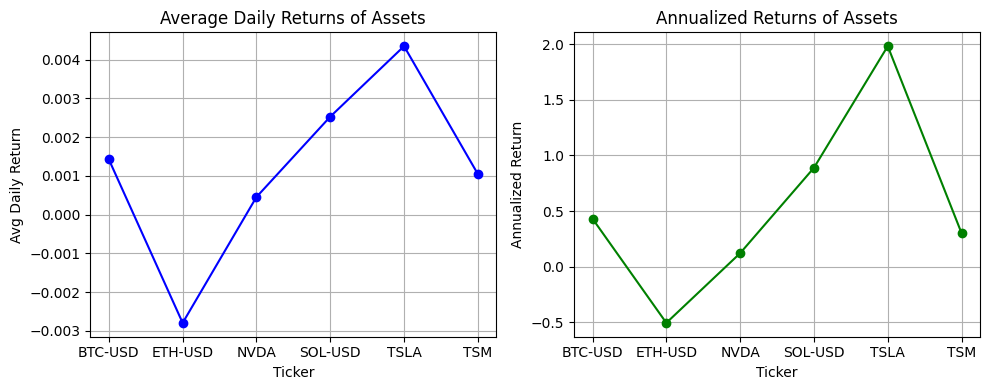

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Daily Returns Plot
df_daily_annual_returns["Avg Daily Return"].plot(
    kind='line',
    marker='o',
    ax=ax1,
    color='blue'
    )

ax1.set_title("Average Daily Returns of Assets")
ax1.set_ylabel("Avg Daily Return")
ax1.grid(True)
ax1.set_xticks(range(len(df_daily_annual_returns)))
ax1.set_xticklabels(df_daily_annual_returns.index)

# Annualized Returns Plot
df_daily_annual_returns["Annualized Return"].plot(
    kind='line',
    marker='o',
    ax=ax2,
    color='green'
    )

ax2.set_title("Annualized Returns of Assets")
ax2.set_ylabel("Annualized Return")
ax2.grid(True)
ax2.set_xticks(range(len(df_daily_annual_returns)))
ax2.set_xticklabels(df_daily_annual_returns.index)

plt.tight_layout()
plt.show()

Now that we are diving into the last part of the 2nd exercise, we will set the target return of the portfolio to 35% (or 0.35).

In [25]:
target_return = 0.35  # 35%

annual_returns = np.array([annualized_return[asset] for asset in assets])
annual_returns

array([ 0.43054164, -0.50623466,  0.88849606,  0.1206108 ,  1.98241326,
        0.30102078])

To build a code that creates a portfolio with the six assets, has a target return of 35%, and has the following restrictions: Sum of weights = 100% and Total allocation to criptocurrencies should be at most 30%, we will need to define some functions first:

- The function `portfolio_return(weights)` calculates the expected return of a portfolio given weights for each asset.

- The function `objective(weights)` defines the objective we want to minimize during optimization.

- The function `weight_sum_constraint(weights)` ensures the sum of all weights equals 1. A portfolio represents 100% of your investment, so all weight allocations need to add up to 1.

- The function `crypto_constraint(weights)` restricts the total allocation to cryptocurrencies (assumed to be at indices 0, 1, and 2 in the weights array) to be less than or equal to 30% (0.3). This helps diversify the portfolio by limiting exposure to cryptocurrencies.

In [26]:
# Constraint: sum of weights = 1
def portfolio_return(weights):
    return np.dot(weights, annual_returns)

# Minimize the squared difference between portfolio return and target return
def objective(weights):
    return (portfolio_return(weights) - target_return) ** 2

# Constraint: weights sum to 1
def weight_sum_constraint(weights):
    return np.sum(weights) - 1

# Constraint: total allocation to cryptocurrencies ≤ 0.30 (30%)
def crypto_constraint(weights):
    crypto_indices = [0, 1, 2]  # Indices of BTC, ETH, SOL
    return 0.30 - np.sum(weights[crypto_indices])

The following cell will perform portfolio optimization to find the optimal allocation of assets that maximizes returns while meeting the constraints mentioned above.

In [27]:
# Initial guess for weights (equal allocation)
initial_weights = np.ones(len(assets)) / len(assets)

# Bounds for each weight (between 0 and 1)
bounds = [(0, 1) for _ in assets]

# Define the constraints
constraints = (
    {'type': 'eq', 'fun': weight_sum_constraint},
    {'type': 'ineq', 'fun': crypto_constraint}  # <= 0.30
)

# Perform the optimization
result = minimize(
    objective,
    initial_weights,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
    )

# Get the optimized weights
optimized_weights = result.x

Finally, we will display the optimized weights for each asset in the portfolio and get the expected return of the optimized portfolio, which must be 35%.

In [28]:
# Print the optimized weights
print("Optimized Weights:")
for i, asset in enumerate(assets):
    print(f"{asset}: {optimized_weights[i]:.4f}")

# Calculate the expected portfolio return
portfolio_expected_return = portfolio_return(optimized_weights)
print(f"\nExpected Portfolio Return: {portfolio_expected_return:.2%}")

Optimized Weights:
BTC-USD: 0.0396
ETH-USD: 0.1899
SOL-USD: 0.0496
NVDA: 0.3109
TSLA: 0.1333
TSM: 0.2766

Expected Portfolio Return: 35.00%


## 3. (5 pts) Random Numbers

#### 3.1. Creating Random Numbers

- Generate a set of 5000 random numbers from three different distributions (uniform, normal, Poisson, etc.), setting the seed for reproducibility
- Plot the histogram for each set

Firstly, we set the seed as 700 (giving 007 vibes)

In [29]:
# Set the seed
np.random.seed(700)

We then create a list of 5000 numbers using each requested distribution

In [30]:
# Generate random numbers from different distributions
uniform_numbers = np.random.uniform(size=5000)
normal_numbers = np.random.normal(size=5000)
poisson_numbers = np.random.poisson(lam=5, size=5000)

Lastly, we can get the chart of the distribution by creating a bigger chart that holds the other 3. By creating a function, we can make this process eficient.

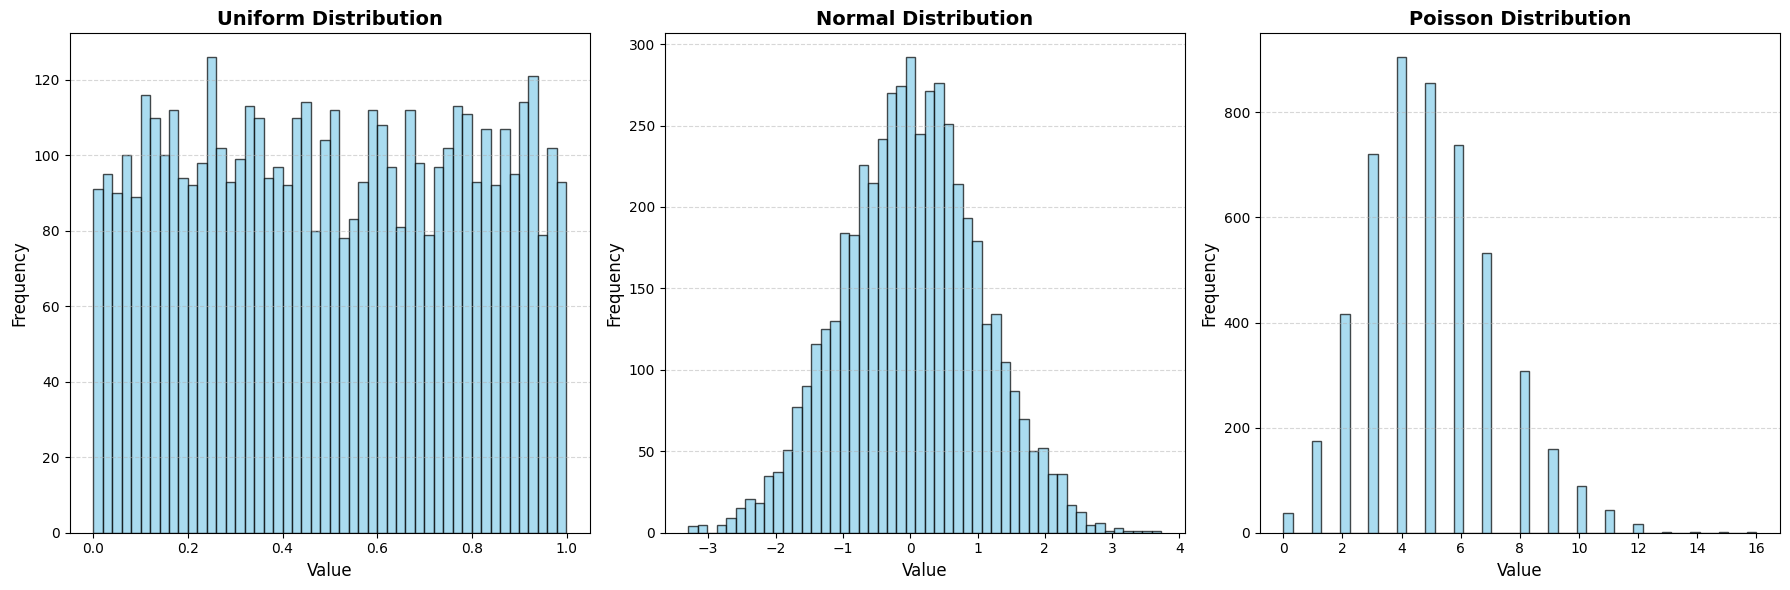

In [33]:
# Creating a figure with bigger size for better visibility
plt.figure(figsize=(18, 6))

# Function to plot histograms with enhanced aesthetics
def plot_histogram(data, title, subplot_index):
    plt.subplot(1, 3, subplot_index)
    plt.hist(data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

# Ploting the histograms with descriptive titles
plot_histogram(uniform_numbers, "Uniform Distribution", 1)
plot_histogram(normal_numbers, "Normal Distribution", 2)
plot_histogram(poisson_numbers, "Poisson Distribution", 3)

# Adjusting layout to avoid overlapping and showing the final plots
plt.tight_layout()
plt.show()

#### 3.2. Using Random Numbers

Consider there was the following game in a casino:
- There are chips containing numbers ranging from 1–100 in a bag.
- Users can bet on even or odd chips.
- In this game, 10 and 11 are special numbers. If we bet on evens, then 10 will be counted as an odd number, and if we bet on odds, then 11 will be counted as an even number.
- If we bet on even numbers and we get 10 then we lose.
- If we bet on odd numbers and we get 11 then we lose.

(A) Using Montecarlo simulation, show that the "house" always wins in the long term at this game. Comment the results

(B) Using Montecarlo simulation estimate what would be the expected final capital if you have 10k and you play the game 1000 times where you bet 10 USD to play and you receive double the amount if you win and loose the bet amount if you loose. Comment the results

First we define our functions. The first one being `play_on_even` where we play with the conditions and return a number. If the return is 1 we get a win, otherwise, it is a lost.

In [34]:
def play_game(bet_on_even):
  chip = np.random.randint(1, 101)

  if chip == 10 and bet_on_even:
    return -1  # Lose if bet on even and get 10
  elif chip == 11 and not bet_on_even:
    return -1  # Lose if bet on odd and get 11
  elif chip % 2 == 0 and bet_on_even:
    return 1  # Win if bet on even and get an even number (excluding 10)
  elif chip % 2 != 0 and not bet_on_even:
    return 1  # Win if bet on odd and get an odd number (excluding 11)
  else:
    return -1  # Lose otherwise

The second function calculates from a pre defined number of trials the number of results that are either win or loss. After this it calculates the percentage of the diference between wins and losses.

- if 0% - wins and losses are balanced
- if negative - number of losses are bigger
- if positive - number of wins are bigger

In [35]:
def monte_carlo_simulation(num_trials):
  wins = 0
  losses = 0
  for _ in range(num_trials):
    # Randomly choose to bet on even or odd
    bet_on_even = np.random.choice([True, False])
    result = play_game(bet_on_even)
    if result == 1:
      wins += 1
    elif result == -1:
      losses += 1

  return (wins - losses) / num_trials

Finally, we simulate the evolution of the capital by defining the bet_amount and if the player gets the bet right, the bet_amount is added, otherwise is removed.

In [36]:
def simulate_capital_evolution(initial_capital, num_games, bet_amount):

  capital = initial_capital
  for _ in range(num_games):
    bet_on_even = np.random.choice([True, False])
    result = play_game(bet_on_even)
    if result == 1:
      capital += bet_amount
    elif result == -1:
      capital -= bet_amount

  return capital

To finish, we define the values we want and print the results.

In [38]:
#Running the Average Outcome
num_trials = 100000
average_outcome = monte_carlo_simulation(num_trials)
print(f"Average outcome over {num_trials} trials: {average_outcome}")

# Running the capital simulation function
initial_capital = 10000
num_games = 1000
bet_amount = 10
final_capital = simulate_capital_evolution(initial_capital, num_games, bet_amount)
print(f"Final capital after {num_games} games: {final_capital}")

Average outcome over 100000 trials: -0.01934
Final capital after 1000 games: 9940


Interpretation of Average Outcome:
The average outcome is expected to be negative, indicating that the house has a statistical advantage in the long run. This is because the game is designed in such a way that there are slightly more losing outcomes than winning outcomes.


Interpretation of Final Capital: The expected final capital is likely to be lower than the initial capital. The Monte Carlo simulation helps us estimate the probability of winning or losing the game and can be used to understand the expected long-term outcome for the player.



## 4. (5 pts) Yield curves


In [37]:
import numpy as np
import pandas as pd
from scipy import optimize
from scipy.optimize import newton, minimize

In [39]:
# Bond Matrix Definition

bonds = np.array([[  1.  , 100.51,   3.  ],
       [  2.  , 100.12,   2.7 ],
       [  3.  ,  99.22,   2.5 ],
       [  4.  ,  93.34,   1.1 ],
       [  5.  ,  95.53,   2.  ],
       [  6.  ,  94.88,   2.1 ],
       [  7.  ,  91.29,   1.7 ],
       [  8.  , 101.05,   3.3 ],
       [  9.  ,  83.13,   1.  ],
       [ 10.  , 101.55,   3.4 ]])

#### 4.1. Build a class called YieldCurve that will receive an array with information on maturity, price and coupon for n bonds (n x 3)


In [40]:
class YieldCurve:
    def __init__(self, bonds_data):
        self.bonds = []

        # start by populating the bonds with each bond's maturity, price, and coupon
        for bond in bonds_data:
            if len(bond) != 3:
                raise ValueError("Each bond entry must contain exactly 3 elements: maturity, price, and coupon.")
            self.bonds.append({
                'maturity': bond[0],
                'price': bond[1],
                'coupon': bond[2]
            })

    def calculate_yield_to_maturity(self, face_value=100):
        ytms = []
        # Calculating YTM for each bond and saving in the ytms (yields to maturity) list
        for bond in self.bonds:
            price = bond['price']
            coupon = bond['coupon']
            maturity = bond['maturity']

            # Defining the bond price function based on YTM
            def bond_price(y):
                return sum([coupon / (1 + y) ** t for t in range(1, int(maturity) + 1)]) + face_value / (1 + y) ** maturity - price

            # Finding the YTM using Newton's method
            try:
                # Performing an initial guess of 5%
                ytm = newton(bond_price, x0=0.05)
                ytms.append(ytm)
            except RuntimeError:
                # If the solver fails, we append None
                ytms.append(None)

        return ytms

    def to_dataframe(self):
        bonds_df = pd.DataFrame(self.bonds)
        # Calculating YTM for each bond and adding it as a new column
        bonds_df['YTM'] = self.calculate_yield_to_maturity()
        return bonds_df

# Creating a YieldCurve object and display bond information with YTM
yield_curve = YieldCurve(bonds)
df = yield_curve.to_dataframe()
print(df)


   maturity   price  coupon       YTM
0       1.0  100.51     3.0  0.024774
1       2.0  100.12     2.7  0.026376
2       3.0   99.22     2.5  0.027746
3       4.0   93.34     1.1  0.028869
4       5.0   95.53     2.0  0.029754
5       6.0   94.88     2.1  0.030466
6       7.0   91.29     1.7  0.031035
7       8.0  101.05     3.3  0.031495
8       9.0   83.13     1.0  0.031855
9      10.0  101.55     3.4  0.032163


#### 4.2. Add a method that will determine the discount factors using matrix operations

In [41]:
def calculate_discount_factors(self):
    # Converting YTMs to decimal number
    ytms = np.array(self.calculate_yield_to_maturity()) / 100
    maturities = np.array([bond['maturity'] for bond in self.bonds])
    discount_factors = 1 / (1 + ytms) ** maturities

    return discount_factors

def to_dataframe(self):

    bonds = pd.DataFrame(self.bonds)
    bonds['Discount Factor'] = self.calculate_discount_factors()

    return bonds

# Adding this method to the existing YieldCurve class
YieldCurve.calculate_discount_factors = calculate_discount_factors
YieldCurve.to_dataframe = to_dataframe

# Creating a YieldCurve object and displaying bond information
yield_curve = YieldCurve(bonds)
df = yield_curve.to_dataframe()
print(df)

   maturity   price  coupon  Discount Factor
0       1.0  100.51     3.0         0.999752
1       2.0  100.12     2.7         0.999473
2       3.0   99.22     2.5         0.999168
3       4.0   93.34     1.1         0.998846
4       5.0   95.53     2.0         0.998514
5       6.0   94.88     2.1         0.998174
6       7.0   91.29     1.7         0.997830
7       8.0  101.05     3.3         0.997484
8       9.0   83.13     1.0         0.997138
9      10.0  101.55     3.4         0.996789


#### 4.3. Add a method that will determine the discount factors using a global solver, ie, solving for all the discount factors at the same time

In [42]:
def calculate_discount_factors_global(self):

    def objective_function(discount_factors):
        # Objective function to minimize the difference between the calculated bond prices and the actual market prices.
        error = 0
        # Iterating through the bonds
        for i, bond in enumerate(self.bonds):
            maturity = bond['maturity']
            coupon = bond['coupon']
            price = bond['price']

            calculated_price = 0
            # Calculating the bond's price using the provided discount factors
            for t in range(1, int(maturity) + 1):
                if t < maturity:
                    # Discounting the coupon payments for periods before maturity
                    calculated_price += coupon * discount_factors[t - 1]
                else:
                    # Discounting the final coupon payment and face value at maturity
                    calculated_price += (coupon + 100) * discount_factors[t - 1]

            # Accumulating the squared error between the calculated and actual prices
            error += (calculated_price - price) ** 2

        return error
    # Initial guess for discount factors ---> close to 1 (no discount)
    initial_guess = np.array([0.99] * len(self.bonds))
    # Bounds for the discount factors
    bounds = [(0, 1)] * len(self.bonds)

    # Optimizing the discount factors using the previous minimize function
    result = minimize(objective_function, initial_guess, bounds=bounds)
    discount_factors = result.x

    return discount_factors

def to_dataframe(self):
    # Converting the list of bonds into a DataFrame
    bonds = pd.DataFrame(self.bonds)
    # Calculating the yield to maturity for each of the bonds
    bonds['YTM'] = self.calculate_yield_to_maturity()
    # Adding the new calculated discount factors as a new column in the DataFrame
    bonds['Discount Factor (Global)'] = self.calculate_discount_factors_global()

    return bonds

# Creating a YieldCurve object and displaying bond information
YieldCurve.calculate_discount_factors_global = calculate_discount_factors_global
YieldCurve.to_dataframe = to_dataframe

# Create a YieldCurve object and display bond information
yield_curve = YieldCurve(bonds)
df = yield_curve.to_dataframe()
print(df)

   maturity   price  coupon       YTM  Discount Factor (Global)
0       1.0  100.51     3.0  0.024774                  0.975825
1       2.0  100.12     2.7  0.026376                  0.949224
2       3.0   99.22     2.5  0.027746                  0.921048
3       4.0   93.34     1.1  0.028869                  0.892278
4       5.0   95.53     2.0  0.029754                  0.863267
5       6.0   94.88     2.1  0.030466                  0.834638
6       7.0   91.29     1.7  0.031035                  0.806768
7       8.0  101.05     3.3  0.031495                  0.778780
8       9.0   83.13     1.0  0.031855                  0.753546
9      10.0  101.55     3.4  0.032163                  0.726438


#### 4.4. Add a method that will bootstrap the discount factors using an iterative procedure, ie, solving for the shortest expiry to the longest

In [43]:
def bootstrap_discount_factors(self):
    # Sorting the bonds by their maturity
    self.bonds.sort(key=lambda bond: bond['maturity'])
    discount_factors = {}
    # Looping through each bond to calculate discount factors using bootstrappingg
    for bond in self.bonds:
        maturity = bond['maturity']
        price = bond['price']
        coupon = bond['coupon']

        if maturity == 1:
            # If maturity is 1 year then, we calculate the discount factor
            discount_factors[1] = price / (100 + coupon)
        else:
             # For bonds with maturity greater than 1 year, we calculate the present value of coupons
            present_value_coupons = 0
            # Calculating the present value of coupons using previously calculated discount factors
            for t in range(1, int(maturity)):
                if t in discount_factors:
                    present_value_coupons += coupon * discount_factors[t]
                else:
                    # Warning if a required discount factor is missing
                    print(f"Warning: Discount factor for year {t} is not found.")
                     # Assume 0 if not found (may not be accurate)
                    present_value_coupons += 0

            # Calculating the discount factor for the bond's maturity
            discount_factors[maturity] = (price - present_value_coupons) / (100 + coupon)

    # Returning the list of discount factors. If its not available, we set it to 0
    return [discount_factors.get(i, 0) for i in range(1, int(self.bonds[-1]['maturity']) + 1)]

def to_dataframe(self):
    # Converting the list of bonds into a DataFrame
    bonds = pd.DataFrame(self.bonds)
    bonds['YTM'] = self.calculate_yield_to_maturity()
    # Adding the global and bootstrapped discount factors to the DataFrame
    bonds['Discount Factor (Global)'] = self.calculate_discount_factors_global()
    bonds['Discount Factor (Bootstrap)'] = self.bootstrap_discount_factors()

    return bonds

YieldCurve.bootstrap_discount_factors = bootstrap_discount_factors
YieldCurve.to_dataframe = to_dataframe

# Create a YieldCurve object and display bond information
yield_curve = YieldCurve(bonds)
df = yield_curve.to_dataframe()
print(df)

   maturity   price  coupon       YTM  Discount Factor (Global)  \
0       1.0  100.51     3.0  0.024774                  0.975825   
1       2.0  100.12     2.7  0.026376                  0.949224   
2       3.0   99.22     2.5  0.027746                  0.921048   
3       4.0   93.34     1.1  0.028869                  0.892278   
4       5.0   95.53     2.0  0.029754                  0.863267   
5       6.0   94.88     2.1  0.030466                  0.834638   
6       7.0   91.29     1.7  0.031035                  0.806768   
7       8.0  101.05     3.3  0.031495                  0.778780   
8       9.0   83.13     1.0  0.031855                  0.753546   
9      10.0  101.55     3.4  0.032163                  0.726438   

   Discount Factor (Bootstrap)  
0                     0.975825  
1                     0.949224  
2                     0.921048  
3                     0.892278  
4                     0.863267  
5                     0.834638  
6                     0.806768 

#### 4.5. Add a method to determine the spot rate (annual compounding) for each maturity from the calculated discount factors

In [44]:
def calculate_spot_rates(self):
    # Retrieving the bootstrapped discount factors
    discount_factors = self.bootstrap_discount_factors()
    spot_rates = []
    # Looping through each discount factor to calculate the corresponding spot rate
    for i in range(len(discount_factors)):
        # Calculating the spot rate using the following formula:
        spot_rate = (1 / discount_factors[i]) ** (1 / (i + 1)) - 1
        spot_rates.append(spot_rate)

    return spot_rates

def to_dataframe(self):
    # Converting the list of bonds into a DataFrame
    bonds = pd.DataFrame(self.bonds)
    bonds['YTM'] = self.calculate_yield_to_maturity()
    # Adding the global and bootstrapped discount factors to the DataFrame
    bonds['Discount Factor (Global)'] = self.calculate_discount_factors_global()
    bonds['Discount Factor (Bootstrap)'] = self.bootstrap_discount_factors()
    bonds['Spot Rate'] = self.calculate_spot_rates()

    return bonds

YieldCurve.calculate_spot_rates = calculate_spot_rates
YieldCurve.to_dataframe = to_dataframe

# Create a YieldCurve object and display bond information
yield_curve = YieldCurve(bonds)
df = yield_curve.to_dataframe()
print(df)

   maturity   price  coupon       YTM  Discount Factor (Global)  \
0       1.0  100.51     3.0  0.024774                  0.975825   
1       2.0  100.12     2.7  0.026376                  0.949224   
2       3.0   99.22     2.5  0.027746                  0.921048   
3       4.0   93.34     1.1  0.028869                  0.892278   
4       5.0   95.53     2.0  0.029754                  0.863267   
5       6.0   94.88     2.1  0.030466                  0.834638   
6       7.0   91.29     1.7  0.031035                  0.806768   
7       8.0  101.05     3.3  0.031495                  0.778780   
8       9.0   83.13     1.0  0.031855                  0.753546   
9      10.0  101.55     3.4  0.032163                  0.726438   

   Discount Factor (Bootstrap)  Spot Rate  
0                     0.975825   0.024774  
1                     0.949224   0.026398  
2                     0.921048   0.027794  
3                     0.892278   0.028904  
4                     0.863267   0.029843 

#### 4.6. Determine the 1y forward rate starting in each of the years from 1 to 9 and plot them

   maturity   price  coupon       YTM  Discount Factor (Global)  \
0       1.0  100.51     3.0  0.024774                  0.975825   
1       2.0  100.12     2.7  0.026376                  0.949224   
2       3.0   99.22     2.5  0.027746                  0.921048   
3       4.0   93.34     1.1  0.028869                  0.892278   
4       5.0   95.53     2.0  0.029754                  0.863267   
5       6.0   94.88     2.1  0.030466                  0.834638   
6       7.0   91.29     1.7  0.031035                  0.806768   
7       8.0  101.05     3.3  0.031495                  0.778780   
8       9.0   83.13     1.0  0.031855                  0.753546   
9      10.0  101.55     3.4  0.032163                  0.726438   

   Discount Factor (Bootstrap)  Spot Rate  Forward Rate  
0                     0.975825   0.024774      0.028025  
1                     0.949224   0.026398      0.030591  
2                     0.921048   0.027794      0.032243  
3                     0.892278

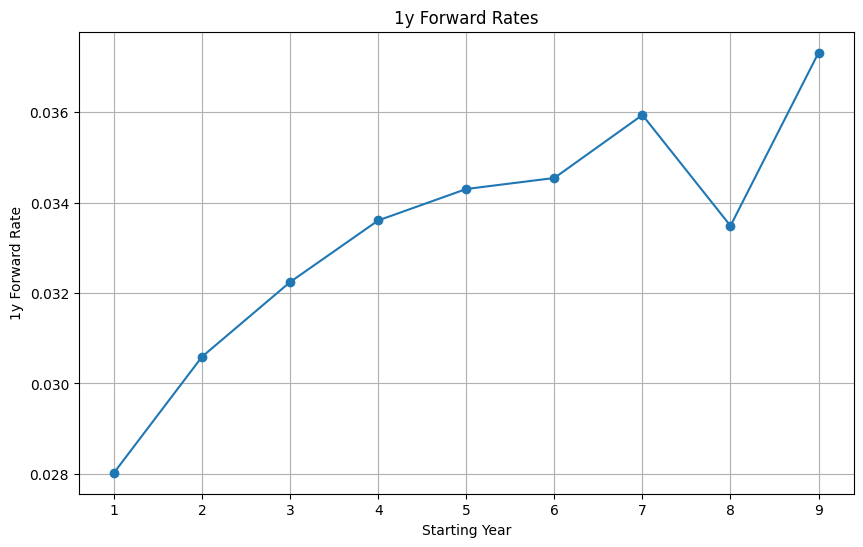

In [45]:
def calculate_forward_rates(self):
    # Retrieving the spot rates calculated previously
    spot_rates = self.calculate_spot_rates()
    forward_rates = []
    # Calculating the forward rates using the spot rates
    for i in range(len(spot_rates) - 1):
        forward_rate = (((1 + spot_rates[i + 1]) ** (i + 2)) / ((1 + spot_rates[i]) ** (i + 1))) - 1
        forward_rates.append(forward_rate)

    # Add a NaN value at the end to match the length of the DataFrame
    forward_rates.append(np.nan)

    return forward_rates

def to_dataframe(self):
    # Converting the list of bonds into a DataFrame
    bonds = pd.DataFrame(self.bonds)
    bonds['YTM'] = self.calculate_yield_to_maturity()
    # Adding the global and bootstrapped discount factors to the DataFrame
    bonds['Discount Factor (Global)'] = self.calculate_discount_factors_global()
    bonds['Discount Factor (Bootstrap)'] = self.bootstrap_discount_factors()
    # Adding the calculated spot rates to the DataFrame
    bonds['Spot Rate'] = self.calculate_spot_rates()
    # Adding the calculated forward rates to the DataFrame
    bonds['Forward Rate'] = self.calculate_forward_rates()

    return bonds

# Attach methods to the class
YieldCurve.calculate_forward_rates = calculate_forward_rates
YieldCurve.to_dataframe = to_dataframe


YieldCurve.calculate_forward_rates = calculate_forward_rates
YieldCurve.to_dataframe = to_dataframe

# Creating a YieldCurve object and display bond information
yield_curve = YieldCurve(bonds)
df = yield_curve.to_dataframe()
print(df)

# Plotting the 1y forward rates
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df['Forward Rate']) + 1), df['Forward Rate'], marker='o')
plt.xlabel('Starting Year')
plt.ylabel('1y Forward Rate')
plt.title('1y Forward Rates')
plt.grid(True)
plt.show()

#### 4.6. Add a method to determine the YTM (Yield to Maturity) for each bond

In [46]:
def calculate_yield_to_maturity(self):
    # Initializing a list to store the Yield to Maturity values
    ytms = []
    # Looping through each bond in the list
    for bond in self.bonds:
        maturity = bond['maturity']
        price = bond['price']
        coupon = bond['coupon']

        # Defining a function to calculate the bond price given a specific YTM
        def bond_price(ytm):
            # Assuming annual coupon payments
            periods = maturity
            coupon_payment = coupon
            # Calculating the bond price using the YTM
            return (coupon_payment * (1 - (1 + ytm) ** -periods) / ytm) + 100 / (1 + ytm) ** periods

        # Initialize the search range for YTM
        low, high = 0, 1
        # Performing a search to find the YTM that matches the market price

        # 100 iterations for precision
        for _ in range(100):
            # Midpoint of the current range
            mid = (low + high) / 2
            if bond_price(mid) > price:
                # Adjusting the upper bound if the calculated price is too high
                low = mid
            else:
                # Adjusting the lower bound if the calculated price is too low
                high = mid
        # Converting to percentage YTM
        ytms.append(mid * 100)

    return ytms

def to_dataframe(self):
    # Converting the list of bonds into a DataFrame
    bonds = pd.DataFrame(self.bonds)
    # Calculating the yield to maturity for each bond and add it to the Dataset
    bonds['YTM'] = self.calculate_yield_to_maturity()
    # Adding the global and bootstrapped discount factors to the DataFrame
    bonds['Discount Factor (Global)'] = self.calculate_discount_factors_global()
    bonds['Discount Factor (Bootstrap)'] = self.bootstrap_discount_factors()
    # Adding the spot rates and forward rates to the DataFrame
    bonds['Spot Rate'] = self.calculate_spot_rates()
    bonds['Forward Rate'] = self.calculate_forward_rates()

    return bonds


YieldCurve.calculate_yield_to_maturity = calculate_yield_to_maturity
YieldCurve.to_dataframe = to_dataframe

# Creating a YieldCurve object and display bond information
yield_curve = YieldCurve(bonds)
df = yield_curve.to_dataframe()
print(df)

   maturity   price  coupon       YTM  Discount Factor (Global)  \
0       1.0  100.51     3.0  2.477365                  0.975825   
1       2.0  100.12     2.7  2.637616                  0.949224   
2       3.0   99.22     2.5  2.774559                  0.921048   
3       4.0   93.34     1.1  2.886876                  0.892278   
4       5.0   95.53     2.0  2.975358                  0.863267   
5       6.0   94.88     2.1  3.046599                  0.834638   
6       7.0   91.29     1.7  3.103467                  0.806768   
7       8.0  101.05     3.3  3.149476                  0.778780   
8       9.0   83.13     1.0  3.185458                  0.753546   
9      10.0  101.55     3.4  3.216281                  0.726438   

   Discount Factor (Bootstrap)  Spot Rate  Forward Rate  
0                     0.975825   0.024774      0.028025  
1                     0.949224   0.026398      0.030591  
2                     0.921048   0.027794      0.032243  
3                     0.892278

#### 4.7. Make a plot of the spot rates, yields and forwards rates with a legend identifying the series

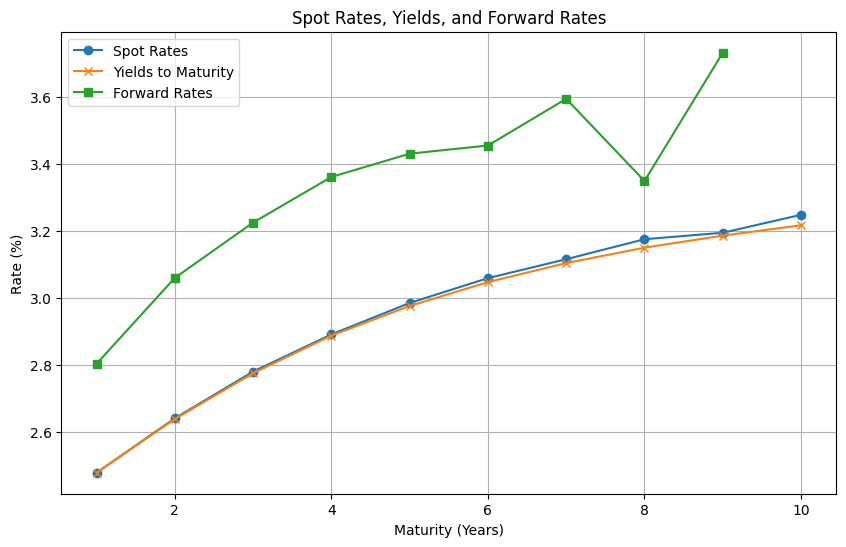

In [49]:
plt.figure(figsize=(10, 6))
# Plotting the Spot Rates, multiplying by 100 to convert to percentage
plt.plot(df['maturity'], df['Spot Rate']*100, label='Spot Rates', marker='o')
# Plotting the Yields to Maturity (YTM)
plt.plot(df['maturity'], df['YTM'], label='Yields to Maturity', marker='x')
# Plotting the Forward Rates, multiplying by 100 to convert to percentage again
plt.plot(df['maturity'], df['Forward Rate']*100, label='Forward Rates', marker='s')

plt.xlabel('Maturity (Years)')
plt.ylabel('Rate (%)')
plt.title('Spot Rates, Yields, and Forward Rates')
plt.legend()
plt.grid(True)
plt.show()